In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sp
from sklearn.cluster import KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [60]:
df=pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [61]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [62]:
df.Type.value_counts() 

2    71
1    59
3    48
Name: Type, dtype: int64

In [63]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [64]:
df.duplicated().sum()

0

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

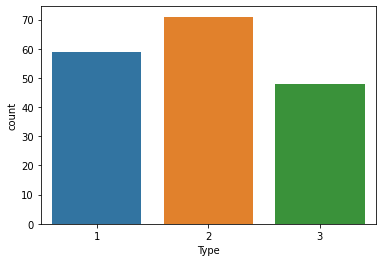

In [65]:
sp.countplot(df["Type"])

# Droping type(independent variable)as pca a unsupervised learning algo

In [66]:
df_new=df.drop("Type",axis=1)
df_new

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [67]:
pca=PCA(n_components=3)

In [68]:
pca.fit(df_new)

PCA(n_components=3)

In [69]:
X=pca.transform(df_new)
X

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01],
       [ 5.72834410e+02, -2.10050143e+01,  3.72614859e-01],
       [ 4.02925358e+02, -1.61026352e+01,  5.67513986e+00],
       [ 8.00053394e+02, -1.21184472e+01,  3.04652991e+00],
       [ 5.63245578e+02,  2.21482866e+00, -5.25510985e-01],
       [ 5.33379651e+02,  1.08048022e+01

In [70]:
pca.explained_variance_ratio_ #shows the variance ratio

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05])

In [71]:
df_new1=pd.concat([pd.DataFrame(X,columns=['pc1','pc2','pc3'])])
df_new1

,pc1,pc2,pc3
0,318.562979,21.492131,3.130735
1,303.097420,-5.364718,6.822835
2,438.061133,-6.537309,-1.113223
3,733.240139,0.192729,-0.917257
4,-11.571428,18.489995,-0.554422
...,...,...,...
173,-6.980211,-4.541137,-2.474707
174,3.131605,2.335191,-4.309931
175,88.458074,18.776285,-2.237577
176,93.456242,18.670819,-1.788392


<AxesSubplot:>

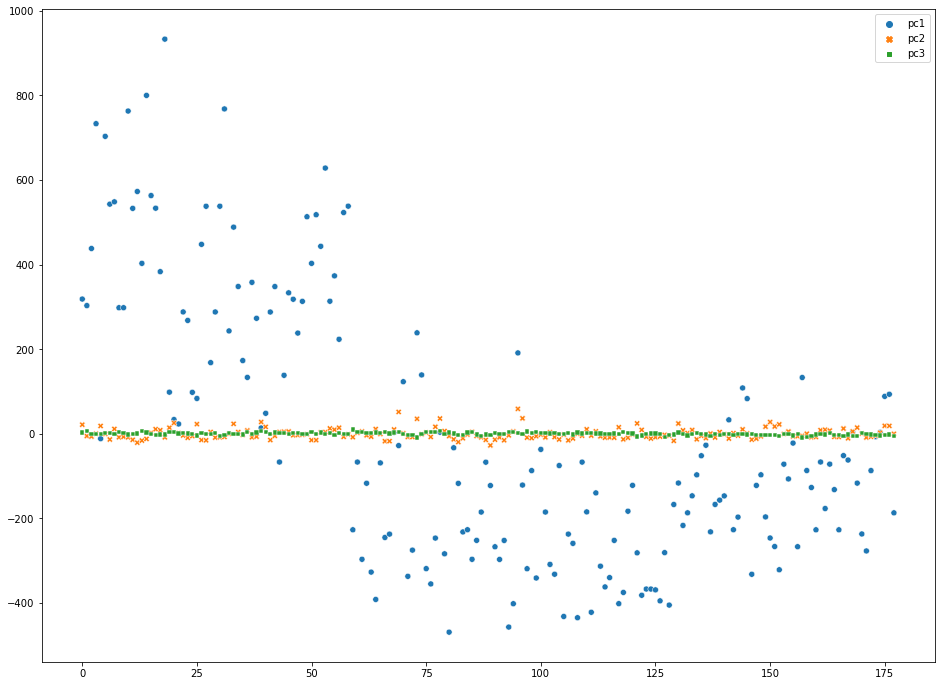

In [72]:
fig=plt.figure(figsize=(16,12))
sp.scatterplot(data=df_new1)

# heirarchial clustering

In [73]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [74]:
h=hc.fit_predict(df_new1)

In [83]:
df["Hierarchical clustering"]=h

# Kmeans Clustering

In [84]:
#clustering pca using grid search
array=[]
for i in range(1,11):
    kmeans=KMeans(i,random_state=42)
    kmeans.fit(df_new1)
    array.append(kmeans.inertia_)

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
kmeans.labels_

array([3, 3, 8, 4, 9, 4, 1, 1, 3, 3, 4, 1, 1, 8, 4, 1, 1, 8, 4, 6, 9, 9,
       3, 3, 6, 6, 8, 1, 6, 3, 1, 4, 3, 1, 8, 6, 6, 8, 3, 9, 9, 3, 8, 0,
       6, 3, 3, 3, 3, 1, 8, 1, 8, 1, 3, 8, 3, 1, 1, 5, 0, 2, 0, 2, 7, 0,
       5, 5, 9, 9, 6, 2, 2, 3, 6, 2, 7, 5, 9, 2, 7, 9, 0, 5, 5, 2, 5, 5,
       0, 0, 2, 2, 5, 7, 7, 6, 0, 2, 0, 2, 9, 5, 2, 2, 0, 7, 5, 5, 7, 0,
       5, 7, 0, 2, 7, 2, 5, 7, 7, 5, 0, 2, 7, 7, 7, 7, 7, 2, 7, 5, 0, 5,
       5, 0, 0, 0, 9, 5, 5, 0, 0, 9, 5, 5, 6, 6, 2, 0, 0, 5, 5, 2, 2, 0,
       0, 9, 2, 6, 0, 0, 5, 0, 5, 0, 0, 5, 0, 0, 9, 0, 5, 2, 0, 9, 9, 6,
       6, 5])

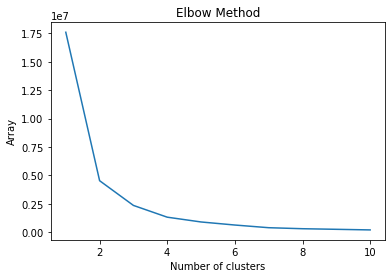

In [86]:
plt.plot(range(1, 11), array)
plt.title('Elbow Method') # prints graph name
plt.xlabel('Number of clusters')# prints label on x axis
plt.ylabel('Array')# prints label on y
plt.show()

# Taking K as 3 (Optimum number of clusters)

In [87]:
array=[]
kmeans=KMeans(3,random_state=42)
kmeans.fit(df_new1)
array.append(kmeans.inertia_)

In [88]:
kmeans.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [89]:
df["cluster_id"]=kmeans.labels_

In [90]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id,Hierarchical clustering
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,2


# Checking if we obtained same number of clusters as the original data

In [97]:
df.cluster_id.value_counts() #after obtaning clusters from k means clustering

0    69
2    62
1    47
Name: cluster_id, dtype: int64

In [44]:
df_new["Hierarchical clustering"].value_counts() #after obtaning clusters from clustering

1    83
2    52
0    43
Name: Hierarchical clustering, dtype: int64

In [98]:
df.Type.value_counts() #original data

2    71
1    59
3    48
Name: Type, dtype: int64